In [60]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from mpl_toolkits.mplot3d import Axes3D
from graph_tool.all import *

In [61]:
banksim = pd.read_csv('/Users/eduardorodriguez/Desktop/TFM/DATA/banksim/banksim.csv')

le = preprocessing.LabelEncoder()
le.fit(list(set(banksim['category'])))
banksim['category'] = le.transform(banksim['category'])

le.fit(list(set(banksim['age'])))
banksim['age'] = le.transform(banksim['age'])

le.fit(list(set(banksim['gender'])))
banksim['gender'] = le.transform(banksim['gender'])
banksim = banksim.drop(['customer', 'merchant', 'zipMerchant', 'zipcodeOri'], axis = 1)

In [64]:
net = pd.read_csv('node2vec_dataframe.csv')
net = net.drop(['Unnamed: 0', '0'], axis = 1)

In [65]:
X = net[:]
Y = X['fraud']

In [33]:
def plot_3D(X, x, y, z):
    sns.reset_orig() # prevent seaborn from over-riding mplot3d defaults

    fig = plt.figure(figsize = (6, 7))
    ax = fig.add_subplot(111, projection='3d')
    #Offset +np.log10
    ax.scatter((X.loc[Y == 0, x]), -(X.loc[Y == 0, y]), np.log10(X.loc[Y == 0, z]), c = 'g', marker = '.', s = 1, label = 'genuine')

    ax.scatter((X.loc[Y == 1, x]) , -(X.loc[Y == 1, y]),np.log10(X.loc[Y == 1, z]), c = 'r', marker = '.', s = 1, label = 'fraudulent')

    plt.axis('tight')

In [54]:
def plot_2D(c1, c2):
    plt.subplots(figsize=(15,10))
    ax = sns.stripplot(Y[:], X[c1], X[c2], jitter= 0.45, palette = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"])

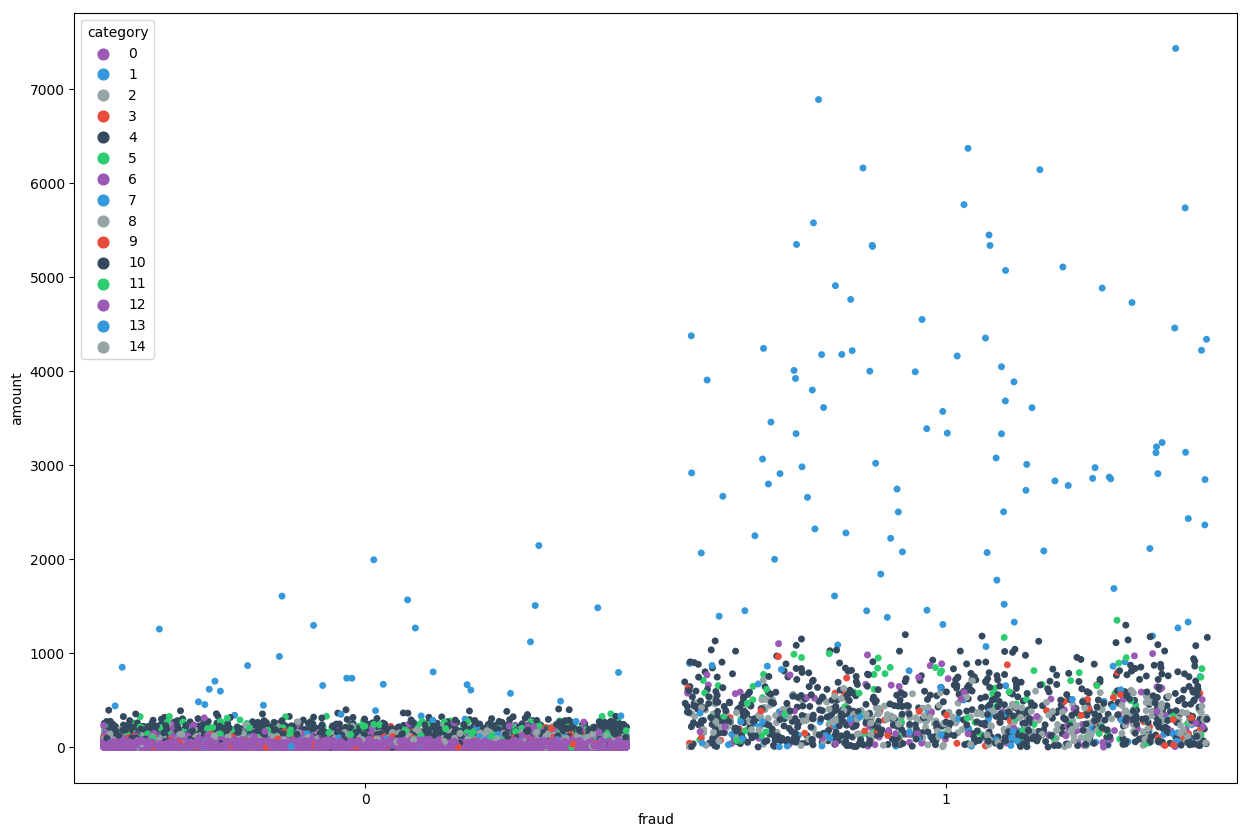

In [55]:
c1 = 'amount'
c2 = 'category'
plot_2D(c1, c2)

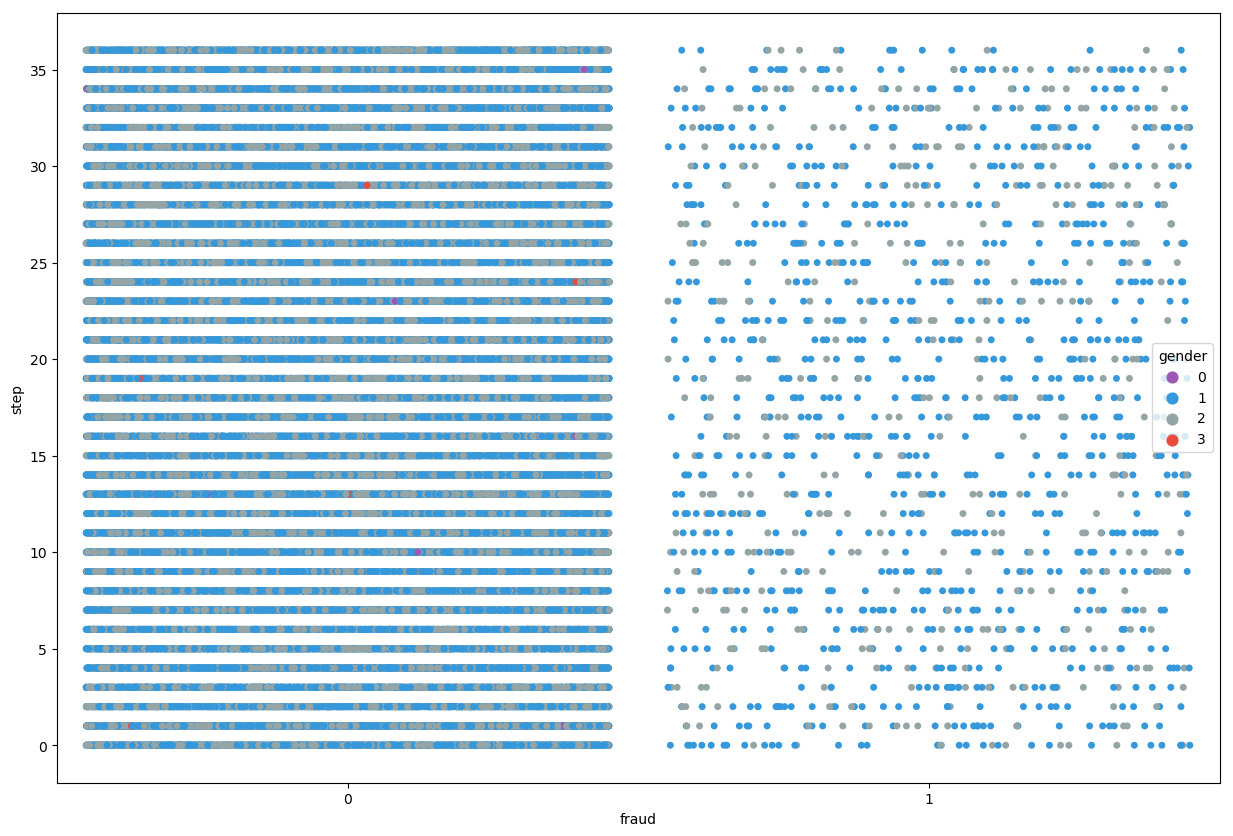

In [56]:
c1 = 'step'
c2 = 'gender'
plot_2D(c1, c2)

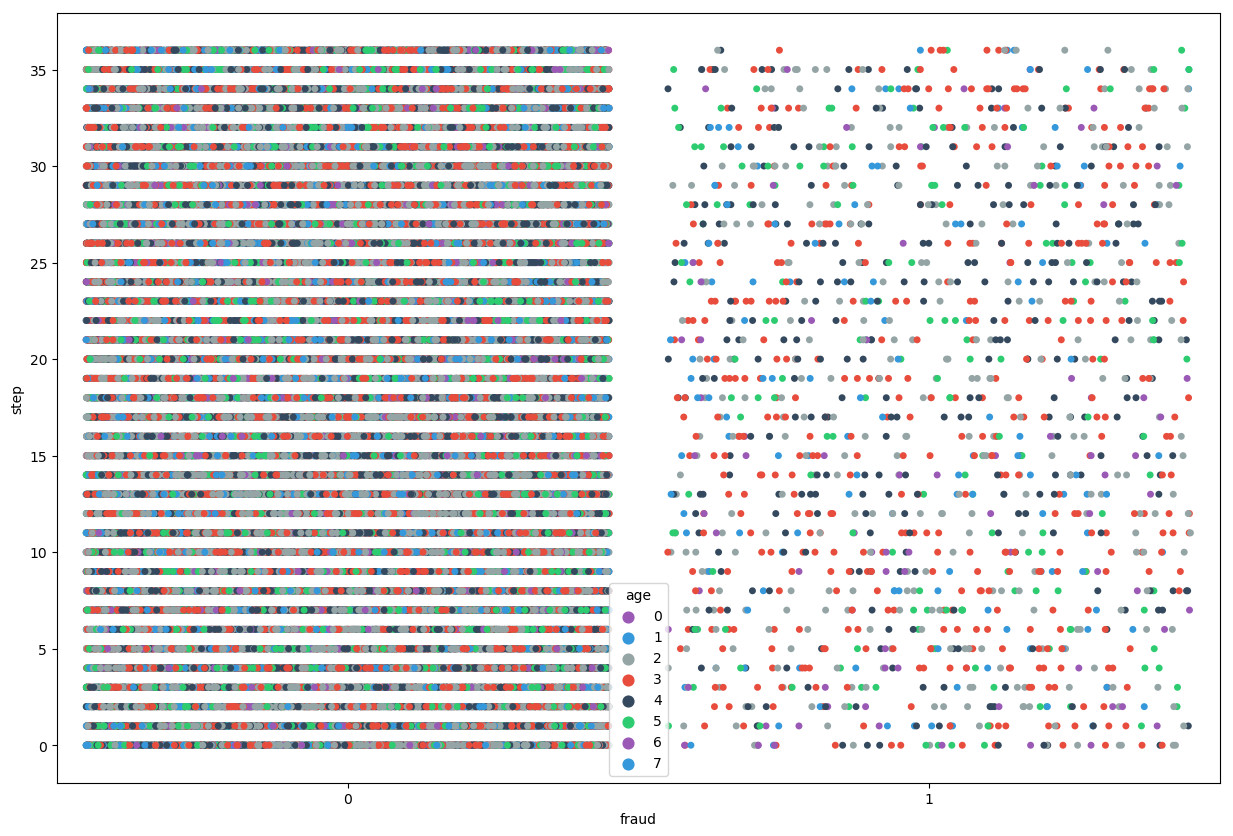

In [57]:
c1 = 'step'
c2 = 'age'
plot_2D(c1, c2)

/Users/eduardorodriguez/anaconda2/envs/TFM/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


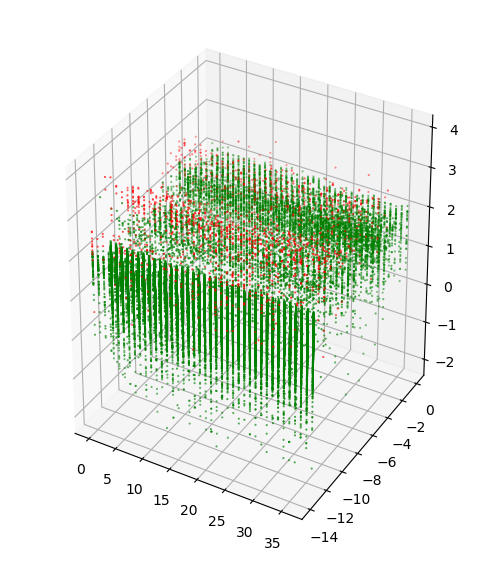

In [34]:
x = 'step'
y = 'category'
z = 'amount'
plot_3D(X, x, y, z)

/Users/eduardorodriguez/anaconda2/envs/TFM/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


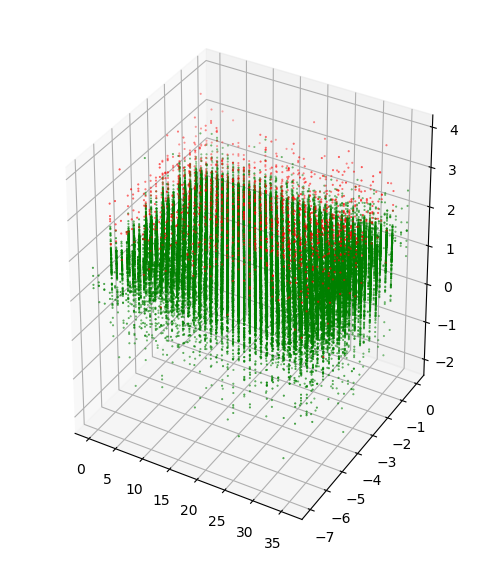

In [35]:
x = 'step'
y = 'age'
z = 'amount'
plot_3D(X, x, y, z)

/Users/eduardorodriguez/anaconda2/envs/TFM/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


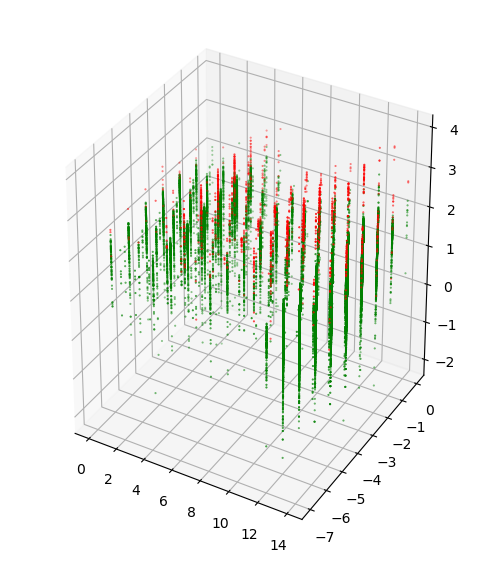

In [36]:
x = 'category'
y = 'age'
z = 'amount'
plot_3D(X, x, y, z)

In [69]:
from sklearn.manifold import TSNE

In [70]:
df_plt=X[X['fraud']==0].sample(1000)
df_plt_pos=X[X['fraud']==1].sample(20)
df_plt=pd.concat([df_plt,df_plt_pos])
y_plt=df_plt['fraud']
X_plt=df_plt.drop('fraud',1)

In [71]:
X_embedded = TSNE(n_components=2).fit_transform(X_plt)

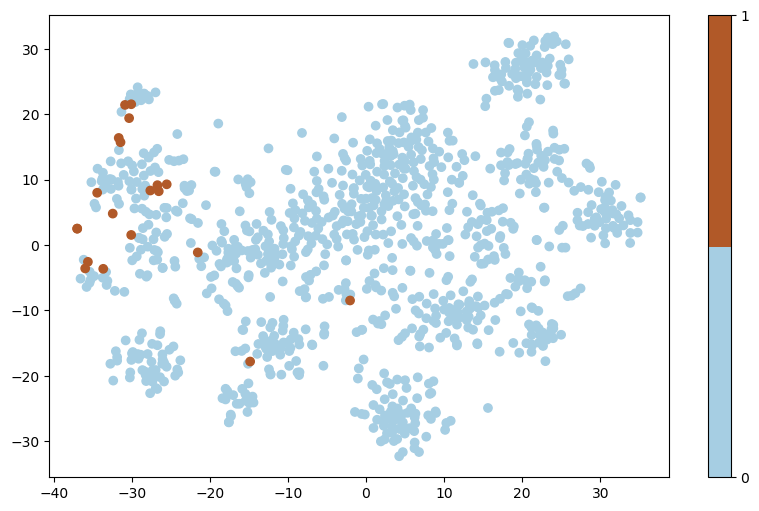

In [72]:
plt.figure(figsize=(10,6))
plt.scatter(X_embedded[:,0], X_embedded[:,1], c=y_plt, cmap=plt.cm.get_cmap("Paired", 2))
plt.colorbar(ticks=range(2))

In [ ]:
df = pd.read_csv('/Users/eduardorodriguez/Desktop/TFM/DATA/banksim/net.csv')
le = preprocessing.LabelEncoder()
le.fit(list(set(df['Source'])))
df['Source'] = le.transform(df['Source'])
le.fit(list(set(df['Target'])))
df['Target'] = le.transform(df['Target'])
df = df[:100]
df.head()

In [ ]:
# Define Graph
g = Graph(directed=False)
# Add Edges
g.add_edge_list(df.values.tolist())

In [ ]:
graph_draw(g, output="GRAPH BANKSIM.pdf")